In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial import cKDTree
from data_loader import *


def data_coord2view_coord(p, resolution, pmin, pmax):
    dp = pmax - pmin
    dv = (p - pmin) / dp * resolution
    return dv

def kNN2DDens(xv, yv, resolution, neighbours, dim=2):
    """
    """
    # Create the tree
    tree = cKDTree(np.array([xv, yv]).T)
    # Find the closest nnmax-1 neighbors (first entry is the point itself)
    grid = np.mgrid[0:resolution, 0:resolution].T.reshape(resolution**2, dim)
    dists = tree.query(grid, neighbours)
    # Inverse of the sum of distances to each grid point.
    inv_sum_dists = 1. / dists[0].sum(1)

In [6]:
def get_bird(name: str= 'American Goldfinch'):

    results = find_bird_ids(name)
    # if results.shape[0]== 1:
    return results.iloc[0]

bird = get_bird()
display(bird)
# display(bird.name)  # id
# display(bird.SPECIES_NAME)  # bird name
# display(bird.Download_grp)  # file name
data = Data(bird_name=bird.SPECIES_NAME, group_n=bird.Download_grp)

,Download_grp,SPECIES_NAME,cnt
SPECIES_ID,,,
5290,10,American Goldfinch,1593352


Download_grp                    10
SPECIES_NAME    American Goldfinch
Name: 5290, dtype: object

,Download_grp,SPECIES_NAME,cnt
SPECIES_ID,,,
5290,10,American Goldfinch,1593352


In [7]:
df = data.bird.sample(500)

In [8]:
df.head()

,band,event,lat,lon,id,source
t,,,,,,
1979-02-10,B88413171361,B,42.75000,-83.75000,5290,B
1994-05-05,B87804583017,B,41.75000,-81.08333,5290,B
2007-12-05,B77573279812,B,34.97250,-81.22333,5290,B
2010-05-07,B77674183386,B,42.58333,-80.08333,5290,B
2013-01-19,B57373595505,B,32.75000,-94.08333,5290,B


In [13]:
point = df[['lat', 'lon']].iloc[0]
display(point.values)

array([ 42.75, -83.75])

In [15]:
resolution = 250

border = {
    'left':df.lon.min,
    'right':df.lon.max(),
    'bottom':df.lat.min(),
    'top':df.lat.max()
}


xv = data_coord2view_coord(point.values, resolution, border['left'], border['right'])
yv = data_coord2view_coord(point.values, resolution, border['bottom'], border['top'])


TypeError: unsupported operand type(s) for -: 'float' and 'method'

TypeError: Image data of dtype object cannot be converted to float

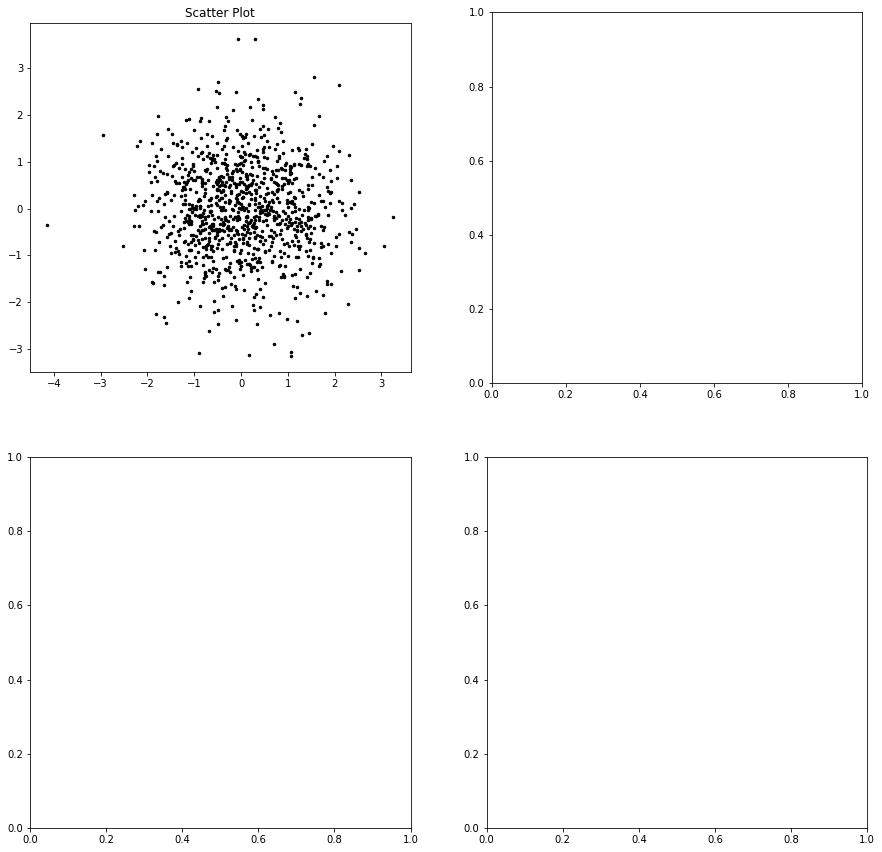

In [16]:

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for ax, neighbours in zip(axes.flatten(), [0, 16, 32, 63]):

    if neighbours == 0:
        ax.plot(xs, ys, 'k.', markersize=5)
        ax.set_aspect('equal')
        ax.set_title("Scatter Plot")
    else:

        im = kNN2DDens(xv, yv, resolution, neighbours)

        ax.imshow(im, origin='lower', extent=extent, cmap=cm.Blues)
        ax.set_title("Smoothing over %d neighbours" % neighbours)
        ax.set_xlim(extent[0], extent[1])
        ax.set_ylim(extent[2], extent[3])

plt.savefig('new.png', dpi=150, bbox_inches='tight')